# WEEK 6
# Adult Income Dataset

# **METADATA**
---
1. Age
2. Workclass
3. fnlwgt
4. Education
5. Education.num
6. Marital.status
7. Occupation
8. Relationship
9. Race
10. Sex
11. Capital.gain
12. Capital.loss
13. Hours.per.week
14. Native.country
15. Income


## Import Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/adult.csv')
df.sample(n=10)

# pd.read_csv digunakan untuk read file dengan format csv
# sample(n=10) digunakan untuk menampilkan data random dari dataset sebanyak 10 row

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
31410,22,State-gov,255575,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,United-States,<=50K
15995,44,Private,164678,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,45,United-States,<=50K
14159,36,Private,135162,HS-grad,9,Never-married,Sales,Own-child,White,Male,0,0,45,?,<=50K
1836,37,Local-gov,233825,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,15024,0,50,United-States,>50K
12942,56,Private,231781,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
9692,59,Private,171355,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
12559,19,Private,113546,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,56,United-States,<=50K
15612,50,State-gov,24647,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
1530,26,Private,256000,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
14591,45,State-gov,81853,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,United-States,>50K


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [179]:
df.info()
# info() digunakan untuk menunjukkan berapa jumlah data pada dataset serta data typenya dan juga jumlah non-null pada tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [180]:
columns_with_question_marks = df.columns[df.isin(['?']).any()]
for column in columns_with_question_marks:
    df = df[df[column] != '?']

# menghapus data-data yang memiliki value "?" sehingga akan mempermudah dalam melakukan machine learning

In [181]:
df.describe()
# describe digunakan untuk menunjukkan percentile, min, max dan jumlah data
# Ringkasan statistik ini menunjukkan bahwa rata-rata usia adalah 38, dengan sebagian besar orang berusia antara 28 hingga 47 tahun. Sebagian besar individu bekerja sekitar 40 jam per minggu, dan sebagian besar tidak memiliki keuntungan atau kerugian modal.
# Rata-rata tingkat pendidikan adalah 10 tahun, sementara nilai fnlwgt bervariasi secara signifikan dalam dataset

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [182]:
df.isnull().sum()
# isnull().sum() digunakan untuk menunjukkan data yang kosong (null), dan pada dataset ini tidak ada data yang null

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


## Visualization

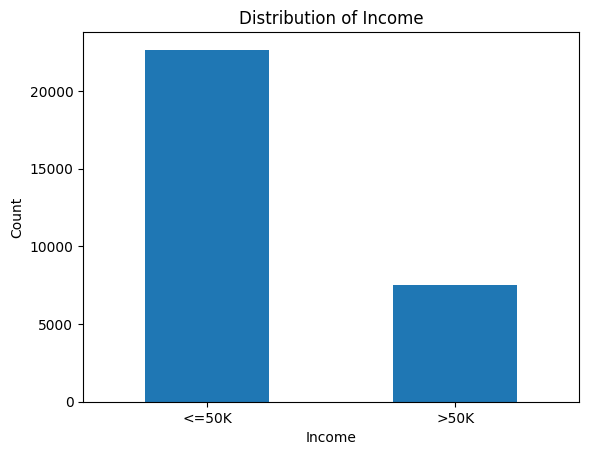

In [183]:
df['income'].value_counts().plot(kind='bar')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Dari grafik yang ditampilkan, pada dataset ini lebih banyak orang dengan income di bawah 50k daripada di atas 50k

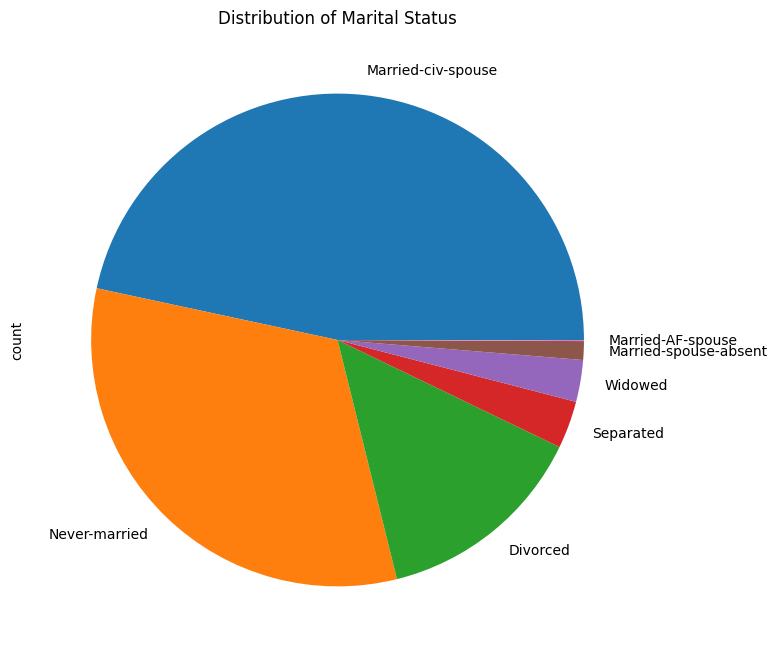

In [184]:
df['marital.status'].value_counts().plot(kind='pie', figsize=(10, 8))
plt.title('Distribution of Marital Status')
plt.show()
# Grafik ini menunjukkan bahwa mayoritas individu dalam dataset ini berada dalam status pernikahan sipil atau belum pernah menikah, dengan sejumlah kecil orang yang bercerai, berpisah, atau menjadi janda/duda.

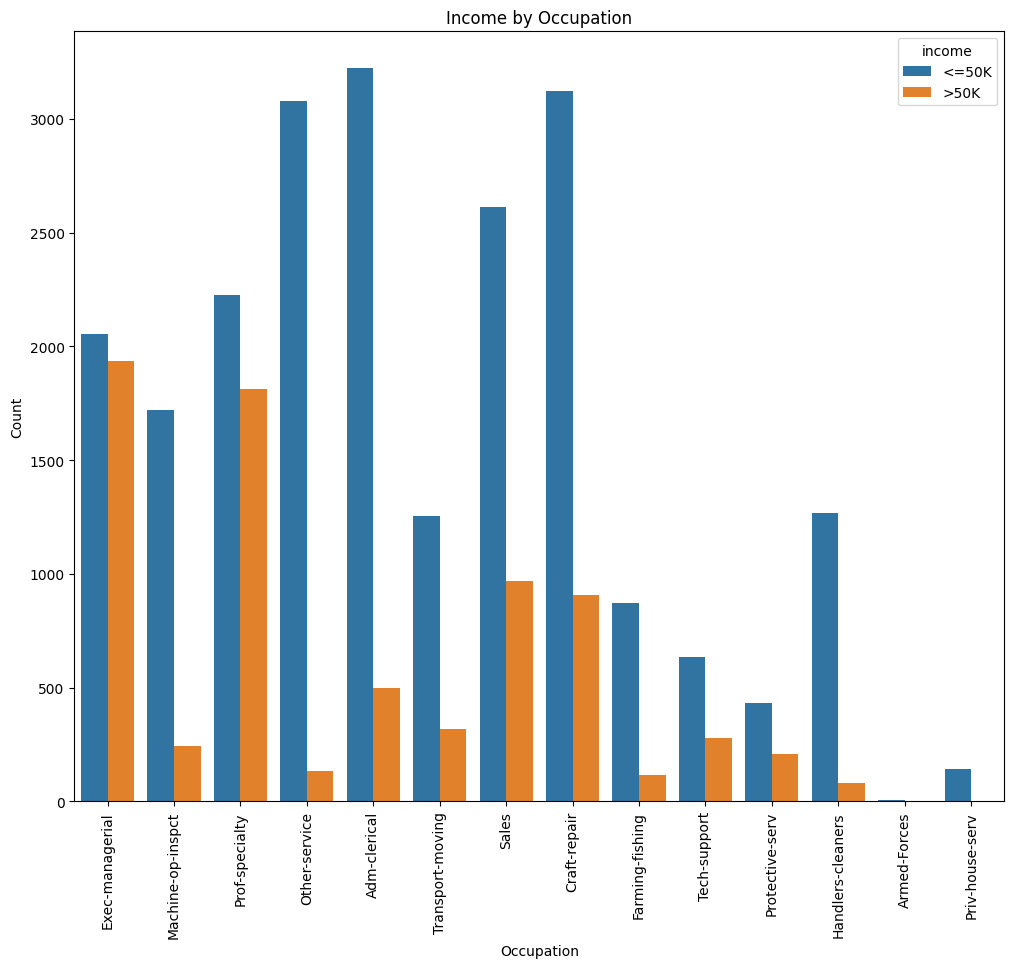

In [185]:
plt.figure(figsize=(12, 10))
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
# grafik ini menampilkan perbandingan pada income berdasarkan dari jenis pekerjaannya, perkerjaan dengan income di bawah 50k paling banyak merupakan adm-clerical, sedangkan untuk income di atas 50k adalah exec-managerial

## Machine Learning

In [186]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])
df['marital.status'] = encoder.fit_transform(df['marital.status'])
df['education'] = encoder.fit_transform(df['education'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])
df['race'] = encoder.fit_transform(df['race'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native.country'] = encoder.fit_transform(df['native.country'])
df['income'] = encoder.fit_transform(df['income'])

# melakukan encoding pada data-data yang awalnya bersifat object menjadi bentuk int

In [187]:
X = df.drop('income', axis=1)
y = df['income']
# y merupakan data yang menjadi target, dan X merupakan variabel-variabel yang akan mempengaruhi hasil dari y

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# memisah data menjadi train dan test, train memiliki 80% data dan test sisanya, lalu random state yang dipakai adalah 42

In [189]:
X_train.shape,X_test.shape
# memeriksa dimensi train data dan test data, memastikan bahwa pembagian data sudah sesuai dan data memiliki jumlah fitur yang sama.

((24129, 14), (6033, 14))

## Decision Tree

In [190]:
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state = 0)
dt_entropy.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria entropy, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [191]:
y_pred_entropy = dt_entropy.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_entropy) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_entropy

In [192]:
print(f"Model accuracy score with criterion entropy: {accuracy_score(y_test, y_pred_entropy)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_entropy

Model accuracy score with criterion entropy: 0.8339134758826454


In [193]:
print("Training set score (Entropy): ", dt_entropy.score(X_train, y_train))
print("Test set score (Entropy): ", dt_entropy.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_entropy

Training set score (Entropy):  0.8363794604003482
Test set score (Entropy):  0.8339134758826454


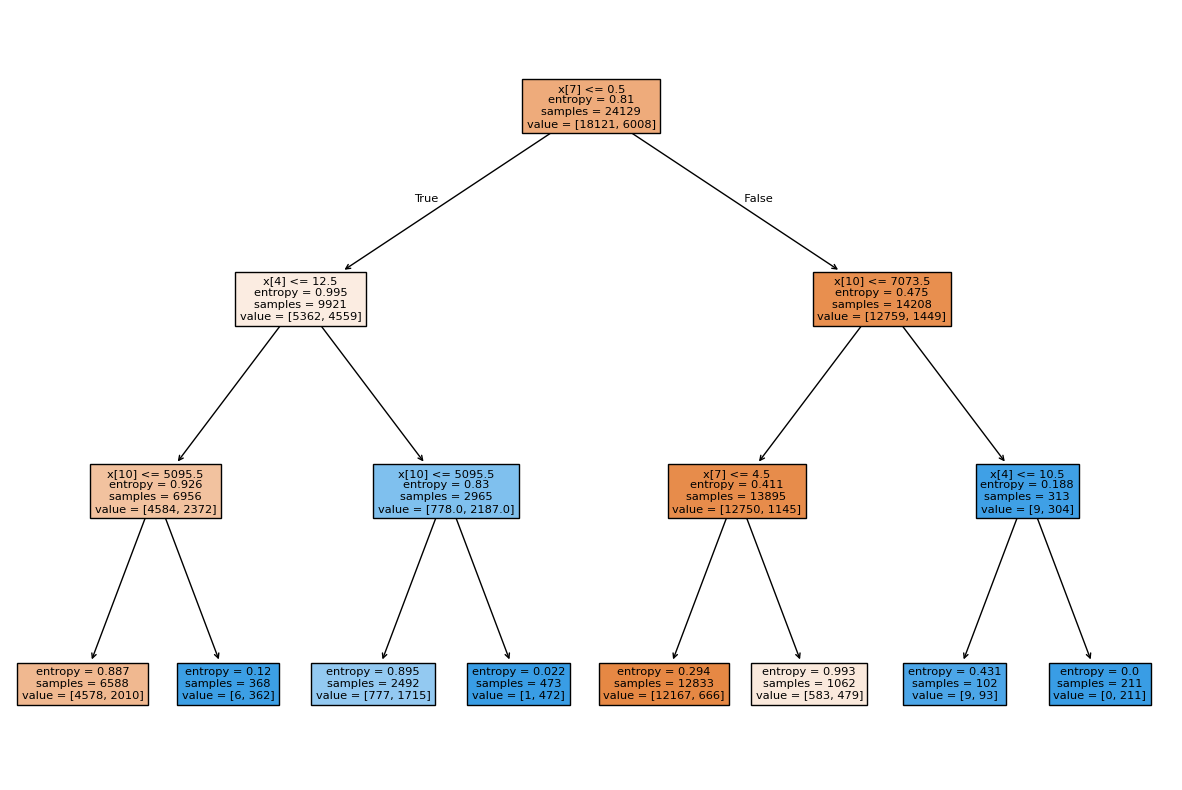

In [194]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_entropy, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_entropy dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [195]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
dt_gini.fit(X_train, y_train)
# Code tersebut membuat dan melatih model Decision Tree dengan kriteria Gini Index, kedalaman maksimum 3, dan seed acak 0, menggunakan data pelatihan X_train dan y_train

DecisionTreeClassifier(max_depth=3, random_state=0)

In [196]:
y_pred_gini = dt_gini.predict(X_test)
# Code tersebut menggunakan model Decision Tree yang telah dilatih (dt_gini) untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_gini

In [197]:
print(f"Model accuracy score with criterion gini index: {accuracy_score(y_test, y_pred_gini)}")
# Code tersebut digunakan untuk menampilkan accurary score dari y_test dan y_pred_gini

Model accuracy score with criterion gini index: 0.8339134758826454


In [198]:
print("Training set score (Gini Index): ", dt_gini.score(X_train, y_train))
print("Test set score (Gini Index): ", dt_gini.score(X_test, y_test))
# Code tersebut digunakan untuk menampilkan training score dan test score dari dt_gini

Training set score (Gini Index):  0.8364623482116955
Test set score (Gini Index):  0.8339134758826454


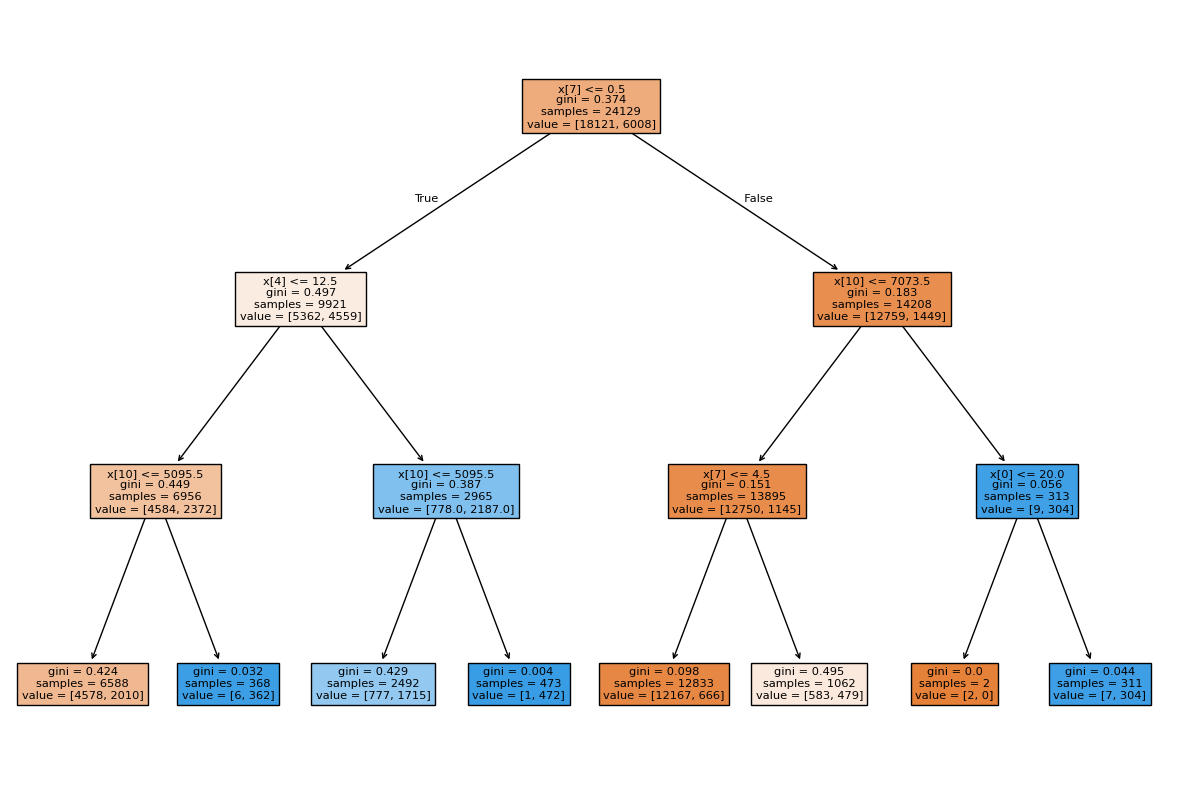

In [199]:
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_gini, filled=True)
plt.show()
# Code tersebut membuat visualisasi pohon keputusan dt_gini dengan ukuran 15x10 inci dan node-node yang diwarnai berdasarkan kelas mayoritas.

In [200]:
print("Confusion Matrix Entropy\n",confusion_matrix(y_test, y_pred_entropy))
print("Confusion Matrix Gini Index\n",confusion_matrix(y_test, y_pred_gini))
# Code ini akan menampilkan dua confusion matrix, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Confusion Matrix Entropy
 [[4315  218]
 [ 784  716]]
Confusion Matrix Gini Index
 [[4315  218]
 [ 784  716]]


In [201]:
print("Classification Report Entropy\n",classification_report(y_test, y_pred_entropy))
print("Classification Report Gini Index\n",classification_report(y_test, y_pred_gini))
# Code ini akan menampilkan dua Classification Report, satu untuk model dengan kriteria Entropy dan satu lagi untuk model dengan kriteria Gini Index

Classification Report Entropy
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4533
           1       0.77      0.48      0.59      1500

    accuracy                           0.83      6033
   macro avg       0.81      0.71      0.74      6033
weighted avg       0.83      0.83      0.82      6033

Classification Report Gini Index
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4533
           1       0.77      0.48      0.59      1500

    accuracy                           0.83      6033
   macro avg       0.81      0.71      0.74      6033
weighted avg       0.83      0.83      0.82      6033



In [202]:
# Model menggunakan kedua metode, Entropy dan Gini Index, menunjukkan akurasi sebesar 83% dalam mengklasifikasikan data dengan performa yang sama di kedua laporan.
# Precision dan recall untuk kelas 0 lebih tinggi dibandingkan kelas 1, menunjukkan model lebih efektif dalam mengklasifikasikan kelas mayoritas (kelas 0).
# Confusion matrix menunjukkan bahwa sekitar 716 dari 1500 sampel kelas 1 diklasifikasikan dengan benar, sementara ada 784 sampel kelas 1 yang salah diklasifikasikan sebagai kelas 0.

## Naive Bayes

In [203]:
nb = GaussianNB()
# Code di atas digunakan untuk membuat model Naive Bayes Gaussian.
nb.fit(X_train, y_train)
# Code di atas digunakan untuk melatih model menggunakan data pelatihan X_train dan y_train.

GaussianNB()

In [204]:
y_pred_nb = nb.predict(X_test)
# Code tersebut menggunakan model Naive Bayes untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_nb

In [205]:
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_nb))
# Code ini akan menampilkan confusion matrix untuk model Naive Bayes
print("Accuracy Score: ",accuracy_score(y_test, y_pred_nb))
# Code ini akan menampilkan accuracy score untuk model Naives Bayes

Confusion Matrix
 [[4295  238]
 [1075  425]]
Accuracy Score:  0.7823636665009116


In [206]:
print("Classification Report Naive Bayes\n",classification_report(y_test, y_pred_nb))
# Code ini akan menampilkan Classification report untuk model Naive Bayes

Classification Report Naive Bayes
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4533
           1       0.64      0.28      0.39      1500

    accuracy                           0.78      6033
   macro avg       0.72      0.62      0.63      6033
weighted avg       0.76      0.78      0.75      6033



In [207]:
# Model Naive Bayes menghasilkan akurasi sebesar 78% dalam klasifikasi data, dengan performa yang jauh lebih baik pada kelas 0 dibandingkan kelas 1.
# Precision untuk kelas 0 adalah 0.80, menunjukkan kemampuan model yang baik untuk mengidentifikasi kelas mayoritas, sedangkan recall untuk kelas 1 hanya 0.28,
# mengindikasikan bahwa model kesulitan mendeteksi kelas minoritas. Confusion matrix menunjukkan bahwa dari 1500 sampel kelas 1, hanya 425 yang terklasifikasi dengan benar,
# sedangkan 1075 salah diklasifikasikan sebagai kelas 0.

## Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
# Code tersebut mengimpor, membuat, dan melatih model Logistic Regression menggunakan data pelatihan untuk memprediksi target.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [209]:
y_pred_log = model.predict(X_test)
# Code tersebut menggunakan model Logistic Regression untuk memprediksi label pada data uji (X_test) dan menyimpan hasilnya dalam variabel y_pred_log

In [210]:
# Displaying the confusion matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_log))
# Code ini akan menampilkan confusion matrix untuk model Logistic Regression
print("Accuracy Score Logistic: ",accuracy_score(y_test, y_pred_log))
# Code ini akan menampilkan accuracy score untuk model Logistic Regression

Confusion Matrix:
 [[4292  241]
 [1081  419]]
Accuracy Score Logistic:  0.7808718713741091


In [211]:
print('Classification Report Logistic:\n',classification_report(y_test, y_pred_log))
# Code ini akan menampilkan Classification report untuk model Logistic Regression

Classification Report Logistic:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4533
           1       0.63      0.28      0.39      1500

    accuracy                           0.78      6033
   macro avg       0.72      0.61      0.63      6033
weighted avg       0.76      0.78      0.75      6033



In [212]:
# Model Logistic Regression menghasilkan akurasi sebesar 78%, serupa dengan Naive Bayes, menunjukkan bahwa model bekerja lebih baik pada kelas mayoritas (kelas 0).
# Precision untuk kelas 0 adalah 0.80, sementara recall untuk kelas 1 hanya 0.28, menunjukkan bahwa model memiliki kesulitan dalam mengidentifikasi kelas minoritas dengan benar.
# Confusion matrix memperlihatkan bahwa dari 1500 sampel kelas 1, hanya 419 yang terklasifikasi dengan benar, dan 1081 sampel salah diklasifikasikan sebagai kelas 0.